In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
df = pd.DataFrame()

In [30]:
df = pd.read_csv('netflix.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,23-05-2002,1.242857,1.145714,1.156429,1.196429,104790000,1.196429
1,24-05-2002,1.225000,1.197143,1.214286,1.210000,11104800,1.210000
2,28-05-2002,1.232143,1.157143,1.213571,1.157143,6609400,1.157143
3,29-05-2002,1.164286,1.085714,1.164286,1.103571,6757800,1.103571
4,30-05-2002,1.107857,1.071429,1.107857,1.071429,10154200,1.071429


In [29]:
df.info

<bound method DataFrame.info of            Date        High         Low        Open       Close     Volume  \
0    2002-05-23    1.242857    1.145714    1.156429    1.196429  104790000   
1    2002-05-24    1.225000    1.197143    1.214286    1.210000   11104800   
2    2002-05-28    1.232143    1.157143    1.213571    1.157143    6609400   
3    2002-05-29    1.164286    1.085714    1.164286    1.103571    6757800   
4    2002-05-30    1.107857    1.071429    1.107857    1.071429   10154200   
...         ...         ...         ...         ...         ...        ...   
4876 2021-05-10  640.390015  606.890015  606.940002  634.809998    9534300   
4877 2021-06-10  639.869995  626.359985  628.179993  639.099976    4580400   
4878 2021-07-10  646.840027  630.450012  642.229981  631.849976    3556900   
4879 2021-08-10  643.799988  630.859985  634.169983  632.659973    3271100   
4880 2021-11-10  639.419983  626.780029  633.200012  627.039978    2861200   

       Adj Close  
0       1.19

In [4]:
df['Date']=pd.to_datetime(df['Date'])
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200,1.071429
...,...,...,...,...,...,...,...
4876,2021-05-10,640.390015,606.890015,606.940002,634.809998,9534300,634.809998
4877,2021-06-10,639.869995,626.359985,628.179993,639.099976,4580400,639.099976
4878,2021-07-10,646.840027,630.450012,642.229981,631.849976,3556900,631.849976
4879,2021-08-10,643.799988,630.859985,634.169983,632.659973,3271100,632.659973


In [31]:
X = np.array(df.index).reshape(-1,1)
y = df['Close']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [32]:
scaler = StandardScaler().fit(X_train)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred1 = lm.predict(X_train)

In [36]:
model = tf.keras.Sequential()
model.add(layers.Dense(48,activation='linear'))
model.add(layers.Dense(24,activation='linear'))
model.add(layers.Dense(1,activation='linear'))
opt = optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='mean_absolute_error',optimizer = opt)
model.fit(X_train,y_train,epochs=100)
model.summary()

Epoch 1/100
107/107 [==============================] - 0s 350us/step - loss: 595.1106
Epoch 2/100
107/107 [==============================] - 0s 326us/step - loss: 79.6153
Epoch 3/100
107/107 [==============================] - 0s 337us/step - loss: 77.0134
Epoch 4/100
107/107 [==============================] - 0s 339us/step - loss: 76.1172
Epoch 5/100
107/107 [==============================] - 0s 326us/step - loss: 74.4758
Epoch 6/100
107/107 [==============================] - 0s 340us/step - loss: 74.2033
Epoch 7/100
107/107 [==============================] - 0s 336us/step - loss: 85.7237
Epoch 8/100
107/107 [==============================] - 0s 336us/step - loss: 80.1941
Epoch 9/100
107/107 [==============================] - 0s 336us/step - loss: 79.4308
Epoch 10/100
107/107 [==============================] - 0s 336us/step - loss: 77.9225
Epoch 11/100
107/107 [==============================] - 0s 337us/step - loss: 74.8614
Epoch 12/100
107/107 [==============================] - 0s 335

107/107 [==============================] - 0s 336us/step - loss: 74.5049
Epoch 97/100
107/107 [==============================] - 0s 336us/step - loss: 76.6894
Epoch 98/100
107/107 [==============================] - 0s 336us/step - loss: 96.2258
Epoch 99/100
107/107 [==============================] - 0s 326us/step - loss: 86.7615
Epoch 100/100
107/107 [==============================] - 0s 332us/step - loss: 162.6624
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 48)                96        
_________________________________________________________________
dense_10 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 25        
Total params: 1,297
Trainable params: 1,297
Non-trainable params: 0
_____________________________

In [37]:
y_pred2 = model.predict(X_train)

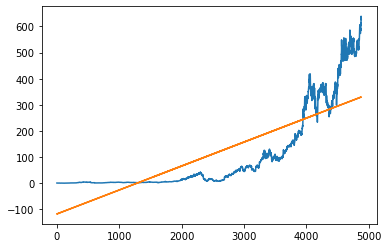

In [38]:
plt.plot(df['Close'])
plt.plot(X_train,y_pred1)

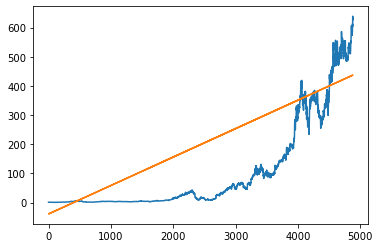

In [39]:
plt.plot(df['Close'])
plt.plot(X_train,y_pred2)